#Multiple Linear Regression
Toshkent shahrining Chilonzor tumanidagi uylarning narxlarini bashorat qilish

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv')
df.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
0,0,Юнусабадский,3,57.0,4,4,52000.0
1,1,Яккасарайский,2,52.0,4,5,56000.0
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0


In [4]:
#Chilonzorni ajratib olamiz
housing = df[df['district'] == 'Чиланзарский']
housing.head()

,Unnamed: 0,district,rooms,size,level,max_levels,price
2,2,Чиланзарский,2,42.0,4,4,37000.0
3,3,Чиланзарский,3,65.0,1,4,49500.0
4,4,Чиланзарский,3,70.0,3,5,55000.0
5,5,Чиланзарский,1,28.0,1,4,25500.0
6,6,Чиланзарский,1,30.0,2,4,21200.0


In [5]:
housing.shape

(1616, 7)

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1616 entries, 2 to 7277
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1616 non-null   int64  
 1   district    1616 non-null   object 
 2   rooms       1616 non-null   int64  
 3   size        1616 non-null   float64
 4   level       1616 non-null   int64  
 5   max_levels  1616 non-null   int64  
 6   price       1616 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 101.0+ KB


In [12]:
columns = ['district', 'rooms', 'size', 'level', 'max_levels', 'price']
columns

['district', 'rooms', 'size', 'level', 'max_levels', 'price']

<Figure size 432x288 with 0 Axes>

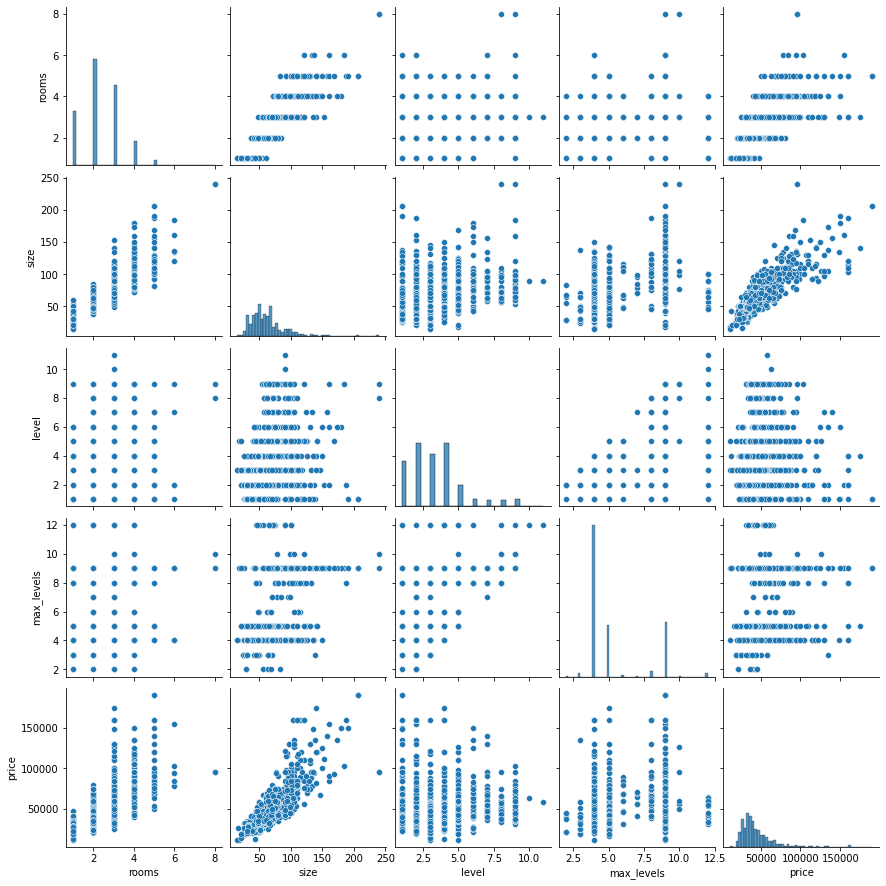

In [15]:
plt.figure(figsize=(6, 4))
sns.pairplot(housing[columns])
plt.show()

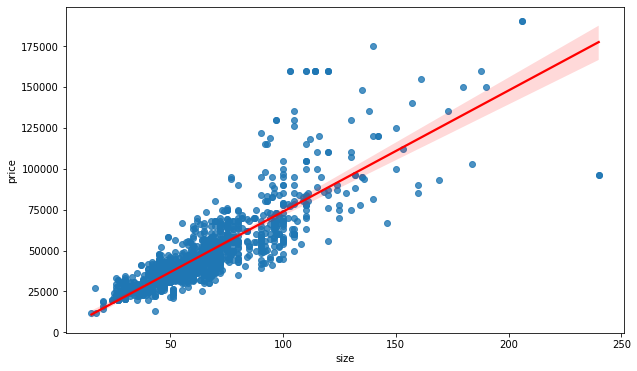

In [18]:
#chiziqli bog'lik -> size ~ price
plt.figure(figsize=(10, 6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

In [24]:
#Birinchi Linear Regression bilan sinab ko'ramiz
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
LR__model = LinearRegression()
MLR_model = LinearRegression()

In [25]:
train_set, test_set = train_test_split(housing, test_size=0.15, random_state=42)
x_train_LR = np.asanyarray(train_set[['size']])
y_train_LR = np.asanyarray(train_set[['price']])

LR__model.fit(x_train_LR, y_train_LR)

LinearRegression()

In [26]:
bashorat_LR = pd.DataFrame()

In [29]:
x_test_LR = np.asanyarray(test_set[['size']])
y_test_LR = np.asanyarray(test_set[['price']])

y_predict_LR = LR__model.predict(x_test_LR)

bashorat_LR['jadvaldagi narx'] = pd.DataFrame(y_test_LR)
bashorat_LR['bashorat qilingan narx'] = y_predict_LR
bashorat_LR.head()

,jadvaldagi narx,bashorat qilingan narx
0,37500.0,39718.059768
1,26500.0,30679.425592
2,25500.0,26160.108503
3,39000.0,44237.376857
4,32500.0,35198.742680


In [30]:
#Baholash (Linear Regression)
MAE_LR = mean_absolute_error(y_test_LR, y_predict_LR)
RMSE_LR = np.sqrt(mean_squared_error(y_test_LR, y_predict_LR))

print(f"Absolut xatolik (Linear Regression) = {MAE_LR}")
print(f"O'rtacha kvadratik xatolik (Linear Regression) = {RMSE_LR}")

Absolut xatolik (Linear Regression) = 7651.904713026272
O'rtacha kvadratik xatolik (Linear Regression) = 12977.44580854305


#Multiple LR

In [52]:
x_train = np.asanyarray(train_set[['rooms', 'size', 'level', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR_model.fit(x_train, y_train)

print(MLR_model.coef_)
print(MLR_model.intercept_)

[[-3324.62371122   896.85362243 -1478.59970318    22.68137398]]
[2746.74024714]


In [53]:
'''
x_train = np.asanyarray(train_set[['size', 'max_levels']])
y_train = np.asanyarray(train_set[['price']])

MLR_model.fit(x_train, y_train)

print(MLR_model.coef_)
print(MLR_model.intercept_)

'''

[[ 769.87027185 -453.28421421]]
[466.402183]


In [54]:
#x_test va y_test
x_test = np.asanyarray(test_set[['rooms', 'size', 'level', 'max_levels']])
#x_test = np.asanyarray(test_set[['size', 'max_levels']])
y_test = np.asanyarray(test_set[['price']])

In [55]:
y_predict = MLR_model.predict(x_test)

bashorat = pd.DataFrame()

bashorat['jadvaldagi narx'] = pd.DataFrame(y_test)
bashorat['bashorat narx'] = y_predict
bashorat.head()

,jadvaldagi narx,bashorat narx
0,37500.0,40226.260006
1,26500.0,28721.395673
2,25500.0,26368.595113
3,39000.0,44392.197423
4,32500.0,35607.038375


In [56]:
MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))

print("Multiple Linear Regression : ")
print(f"Absolut xatolik = {MAE}")
print(f"O'rtacha kvadratik xatolik = {RMSE}")
print("\nLinear Regression : ")
print(f"Absolut xatolik (Linear Regression) = {MAE_LR}")
print(f"O'rtacha kvadratik xatolik (Linear Regression) = {RMSE_LR}")

Multiple Linear Regression : 
Absolut xatolik = 7613.92476039463
O'rtacha kvadratik xatolik = 12945.91387419672

Linear Regression : 
Absolut xatolik (Linear Regression) = 7651.904713026272
O'rtacha kvadratik xatolik (Linear Regression) = 12977.44580854305
